In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")

from sleeprnn.data import utils, stamp_correction
from sleeprnn.common import viz, constants, pkeys
from sleeprnn.helpers import reader
from sleeprnn.detection import simple_detection

viz.notebook_full_width()

In [2]:
dataset = reader.load_dataset(constants.CAP_SS_NAME)

Dataset cap_ss with 80 patients.
Loading from checkpoint... Loaded
Global STD: None


In [4]:
subject_id = dataset.all_ids[0]
signal = dataset.get_subject_signal(subject_id, normalize_clip=False)
n2_pages = dataset.get_subject_pages(subject_id, pages_subset=constants.N2_RECORD)

In [5]:
signal_sigma = utils.apply_bandpass(signal, dataset.fs, 11, 16)

/home/ntapia/miniconda3/envs/tf/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [6]:
# detect
thr_abs = 12.3
thr_factor_relative = 4.5

events_abs = simple_detection.simple_detector_absolute(signal, dataset.fs, thr_abs)
events_rel = simple_detection.simple_detector_relative(signal, dataset.fs, thr_factor_relative, n2_pages, dataset.page_duration)

In [7]:
for events in [events_abs, events_rel]:
    n_events = events.shape[0]
    n_minutes = n2_pages.size * dataset.page_duration / 60
    density = n_events / n_minutes
    print("Detections %d (density %1.2f epm)" % (n_events, density))

Detections 693 (density 2.68 epm)
Detections 693 (density 2.68 epm)


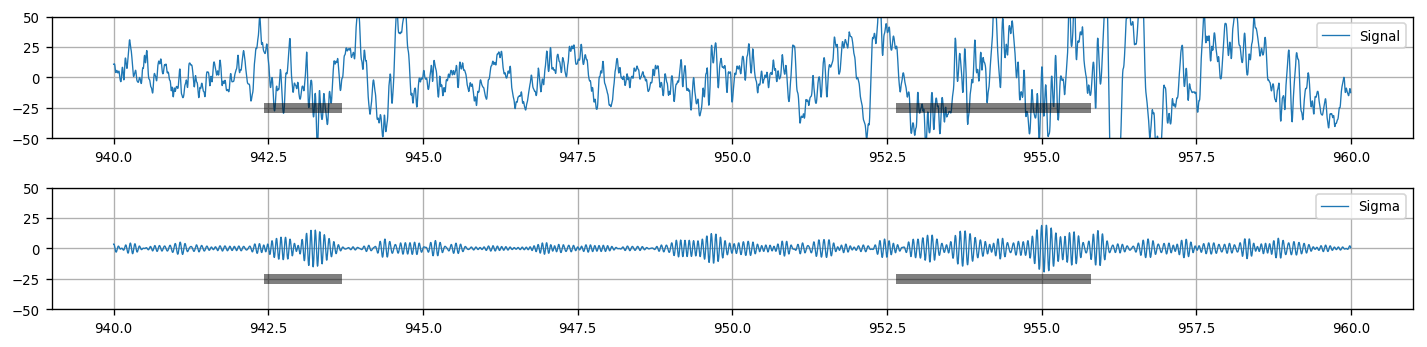

In [10]:
# Show segment
chosen_page = n2_pages[40]  # 20  # 25

start_sample = chosen_page * dataset.page_size
end_sample = start_sample + dataset.page_size
time_axis = np.arange(start_sample, end_sample) / dataset.fs
stamps = utils.filter_stamps(events_abs, start_sample, end_sample)

fig, ax = plt.subplots(2, 1, figsize=(12, 3), dpi=120)
ax[0].plot(time_axis, signal[start_sample:end_sample], linewidth=0.8, label="Signal")
ax[1].plot(time_axis, signal_sigma[start_sample:end_sample], linewidth=0.8, label="Sigma")
for s_ax in ax:
    s_ax.tick_params(labelsize=8)
    s_ax.legend(fontsize=8, loc="upper right")
    s_ax.set_ylim([-50, 50])
    s_ax.grid()
    for e in stamps:
        s_ax.plot(e / dataset.fs, [-25, -25], linewidth=6, alpha=0.5, color="k")
plt.tight_layout()
plt.show()